<a href="https://colab.research.google.com/github/HanPeizhi/Decision-Tree-Classification-on-PCA/blob/main/CS831_Project_PCA_Heart_1123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Original Dataset

Firstly, upload the dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (10).csv


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('heart.csv')

Find some information about the original dataset:

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Preprocessing

### Transform numerical data into categorical data

In [ ]:
df['sex'] = df['sex'].replace(1, 'male')
df['sex'] = df['sex'].replace(0, 'female')

In [ ]:
df['cp'] = df['cp'].replace(0, 'Typical Angina') 
df['cp'] = df['cp'].replace(1, 'Atypical Angina')
df['cp'] = df['cp'].replace(2, 'Non-anginal Pain')
df['cp'] = df['cp'].replace(3, 'Asymptomatic')

In [ ]:
##(Value 1: upsloping, Value 2: flat, Value 3: downsloping)
df['slope'] = df['slope'].replace(0, 'Upsloping')
df['slope'] = df['slope'].replace(1, 'Flat')
df['slope'] = df['slope'].replace(2, 'Downsloping')

In [ ]:
df['restecg'] = df['restecg'].replace(0, 'Normal')
df['restecg'] = df['restecg'].replace(1, 'ST-T wave abnormality')
df['restecg'] = df['restecg'].replace(2, 'Left Ventricular Hypertrophy')

In [ ]:
df['thal'] = df['thal'].replace(1, 'normal')
df['thal'] = df['thal'].replace(2, 'fixed defect')
df['thal'] = df['thal'].replace(3, 'reversable defect')

In [ ]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')

In [ ]:
df['fbs'] = df['fbs'].replace(1, 'True')
df['fbs'] = df['fbs'].replace(0, 'False')

In [ ]:
df['exang'] = df['exang'].replace(1, 'Yes')
df['exang'] = df['exang'].replace(0, 'No')

In [ ]:
df['target'] = df['target'].replace(1, 'Yes')
df['target'] = df['target'].replace(0, 'No')

In [ ]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

### Dummy

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,cp_Atypical Angina,cp_Non-anginal Pain,cp_Typical Angina,fbs_True,restecg_Normal,restecg_ST-T wave abnormality,exang_Yes,slope_Flat,slope_Upsloping,thal_fixed defect,thal_normal,thal_reversable defect,target_Yes
0,63,145,233,150,2.3,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
1,37,130,250,187,3.5,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1
2,41,130,204,172,1.4,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1


In [ ]:
#del df['Unnamed: 0']

In [ ]:
#from google.colab import files
#df.to_csv(r'heart-after_preprocessing.csv')
#files.download('heart-after_preprocessing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
age                              303 non-null int64
trestbps                         303 non-null int64
chol                             303 non-null int64
thalach                          303 non-null int64
oldpeak                          303 non-null float64
ca                               303 non-null int64
sex_male                         303 non-null uint8
cp_Atypical Angina               303 non-null uint8
cp_Non-anginal Pain              303 non-null uint8
cp_Typical Angina                303 non-null uint8
fbs_True                         303 non-null uint8
restecg_Normal                   303 non-null uint8
restecg_ST-T wave abnormality    303 non-null uint8
exang_Yes                        303 non-null uint8
slope_Flat                       303 non-null uint8
slope_Upsloping                  303 non-null uint8
thal_fixed defect                303 non-null uint8
thal_norm

### Visualization-Scatter plot


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="ticks")

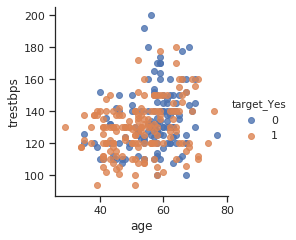

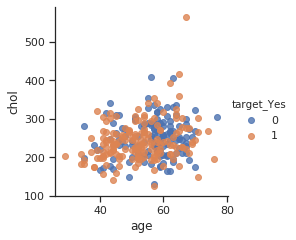

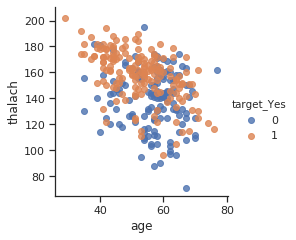

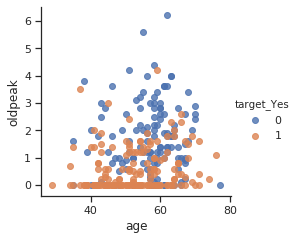

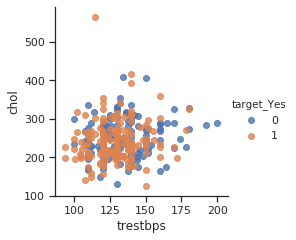

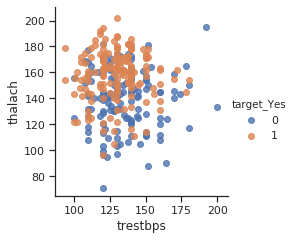

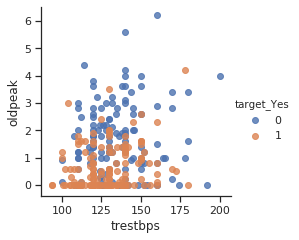

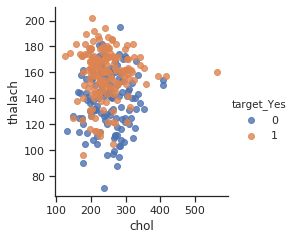

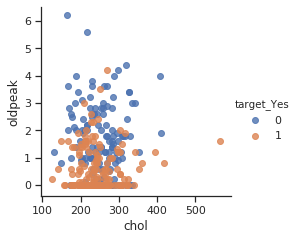

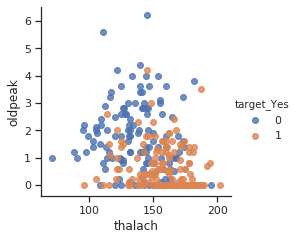

In [ ]:
sns.lmplot('age', 'trestbps', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('age', 'chol', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('age', 'thalach', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('age', 'oldpeak', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('trestbps', 'chol', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('trestbps', 'thalach', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('trestbps', 'oldpeak', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('chol', 'thalach', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('chol', 'oldpeak', data=df, hue='target_Yes', fit_reg=False, height=3.5)
sns.lmplot('thalach', 'oldpeak', data=df, hue='target_Yes', fit_reg=False, height=3.5)

### PCA

Get a new dataset which only contains continous data from the original dataset: age, trestbps, chol,	thalach,	oldpeak

> 缩进块



Standardize the Data
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target_Yes']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


PCA Projection to 2D

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC 1', 'PC 2'])

In [ ]:
PCA_df = pd.concat([principalDf, df[['target_Yes']]], axis = 1)

In [ ]:
PCA_df.describe

<bound method NDFrame.describe of          PC 1      PC 2  target_Yes
0   -1.267716 -0.082358           1
1    0.932350 -0.070433           1
2    1.419900 -0.389838           1
3    0.920091  0.263924           1
4    0.047331  1.591873           1
..        ...       ...         ...
298 -0.568496 -0.172939           0
299  0.510919 -0.812798           0
300 -2.014465 -1.067526           0
301 -0.414562 -2.323948           0
302  0.878756  0.648278           0

[303 rows x 3 columns]>

Visualize 2D Projection

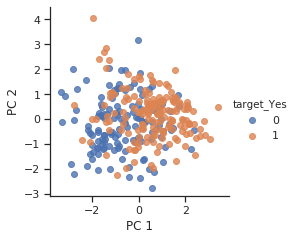

In [ ]:
sns.lmplot('PC 1', 'PC 2', data=PCA_df, hue='target_Yes', fit_reg=False, height=3.5)

In [ ]:
PCA_df.describe

<bound method NDFrame.describe of          PC 1      PC 2  target_Yes
0   -1.267716 -0.082358           1
1    0.932350 -0.070433           1
2    1.419900 -0.389838           1
3    0.920091  0.263924           1
4    0.047331  1.591873           1
..        ...       ...         ...
298 -0.568496 -0.172939           0
299  0.510919 -0.812798           0
300 -2.014465 -1.067526           0
301 -0.414562 -2.323948           0
302  0.878756  0.648278           0

[303 rows x 3 columns]>

In [ ]:
df1 = df.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target_Yes'], axis=1)

In [ ]:
df1

,ca,sex_male,cp_Atypical Angina,cp_Non-anginal Pain,cp_Typical Angina,fbs_True,restecg_Normal,restecg_ST-T wave abnormality,exang_Yes,slope_Flat,slope_Upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0,1,0,0,0,1,1,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,1,0,0,1,1,0,0
2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,1,0,0,1,1,1,0,0,0,1
299,0,1,0,0,0,0,0,1,0,1,0,0,0,1
300,2,1,0,0,1,1,0,1,0,1,0,0,0,1
301,1,1,0,0,1,0,0,1,1,1,0,0,0,1


In [ ]:
final_df = pd.concat([PCA_df, df1], axis = 1)

The final dataframe combining numerical features(after PCA) and categorical features:

In [ ]:
final_df.head(5)

,PC 1,PC 2,target_Yes,ca,sex_male,cp_Atypical Angina,cp_Non-anginal Pain,cp_Typical Angina,fbs_True,restecg_Normal,restecg_ST-T wave abnormality,exang_Yes,slope_Flat,slope_Upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,-1.267716,-0.082358,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0
1,0.932350,-0.070433,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0
2,1.419900,-0.389838,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0.920091,0.263924,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
4,0.047331,1.591873,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0


In [ ]:
final_df.describe

<bound method NDFrame.describe of          PC 1      PC 2  ...  thal_normal  thal_reversable defect
0   -1.267716 -0.082358  ...            1                       0
1    0.932350 -0.070433  ...            0                       0
2    1.419900 -0.389838  ...            0                       0
3    0.920091  0.263924  ...            0                       0
4    0.047331  1.591873  ...            0                       0
..        ...       ...  ...          ...                     ...
298 -0.568496 -0.172939  ...            0                       1
299  0.510919 -0.812798  ...            0                       1
300 -2.014465 -1.067526  ...            0                       1
301 -0.414562 -2.323948  ...            0                       1
302  0.878756  0.648278  ...            0                       0

[303 rows x 17 columns]>

## Train Model


In [ ]:
# Library for data splitting
from sklearn.model_selection import train_test_split 

In [ ]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(final_df.drop('target_Yes', 1),   # delet the label
                            final_df['target_Yes'],        # label set    
                            test_size = .2,        # test size 20%, train size 80% 
                            random_state = 4)       # random seed, same seed same output

### Decision Tree

In [ ]:
# Decision Trees Library
# https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
clf = clf.fit(x_train, y_train)

[Text(172.1377358490566, 207.55636363636364, 'X[13] <= 0.5\nentropy = 0.997\nsamples = 242\nvalue = [113, 129]'),
 Text(91.59622641509434, 187.7890909090909, 'X[6] <= 0.5\nentropy = 0.788\nsamples = 106\nvalue = [81, 25]'),
 Text(53.69433962264151, 168.0218181818182, 'X[0] <= 1.497\nentropy = 0.999\nsamples = 33\nvalue = [16, 17]'),
 Text(47.37735849056604, 148.25454545454545, 'X[10] <= 0.5\nentropy = 0.985\nsamples = 28\nvalue = [16, 12]'),
 Text(25.267924528301887, 128.48727272727274, 'X[1] <= 0.271\nentropy = 0.998\nsamples = 21\nvalue = [10, 11]'),
 Text(12.633962264150943, 108.72, 'X[1] <= -1.031\nentropy = 0.971\nsamples = 15\nvalue = [9, 6]'),
 Text(6.316981132075472, 88.95272727272729, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(18.950943396226414, 88.95272727272729, 'X[2] <= 2.5\nentropy = 0.996\nsamples = 13\nvalue = [7, 6]'),
 Text(12.633962264150943, 69.18545454545455, 'X[15] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(6.316981132075472, 49.41818

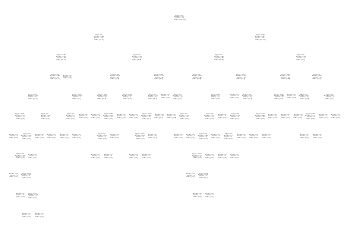

In [ ]:
tree.plot_tree(clf.fit(x_train, y_train))

In [ ]:
predTree = clf.predict(x_test)

In [ ]:
predTree

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=uint8)

## Evaluation

In [ ]:
score = clf.score(x_test, y_test)
print('The accuracy is:', score)

The accuracy is: 0.7540983606557377


## Visualization

In [ ]:
# To get the attribute name and set the class name
feature_names = [i for i in x_train.columns]

y_train_str = y_test.astype('str')
y_train_str[y_train_str == '0'] = 'No Disease'
y_train_str[y_train_str == '1'] = 'Disease'
y_train_str = y_train_str.values

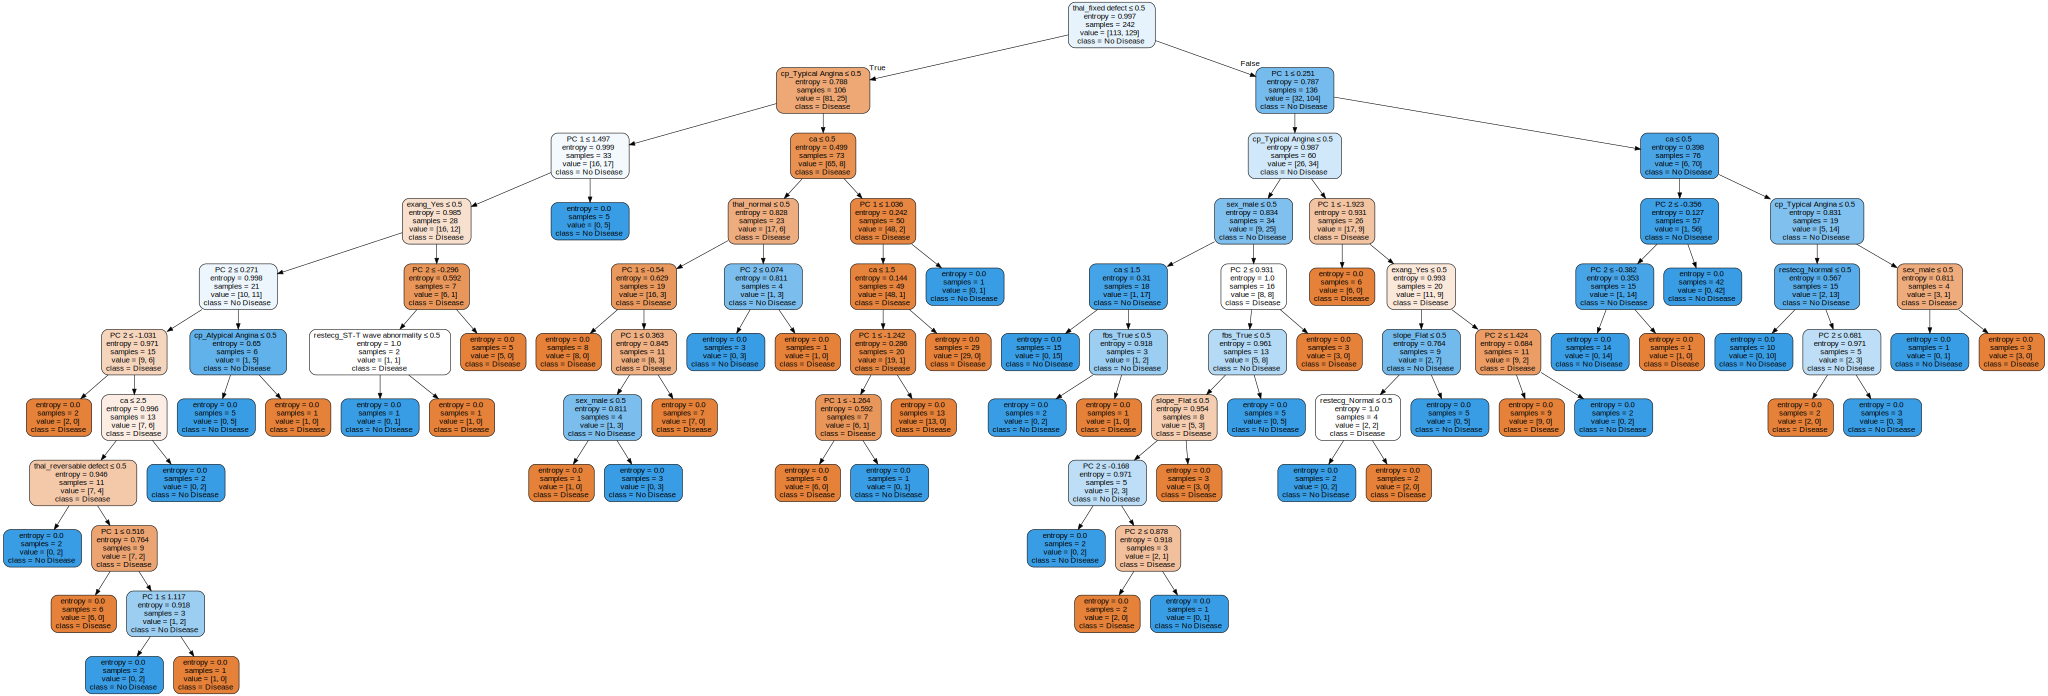

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names = feature_names,  
                      class_names = y_train_str,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Heart_DT-PCA") 
files.download("Heart_DT-PCA.pdf")
graph